In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

#### Problema 1.

Leer y graficar los datos pertenecientes a la función de luminosidad de galaxias obtenida por Blanton et al (2001). Los datos correspondientes a la función de luminosidad se pueden descargar del aula virtual. 

In [2]:
df=pd.read_csv('datos(1).csv')
#df['MAG'].values
df.head() # para ver solo los primeros elementos

,MAG,PHI,error_inf,error_sup
0,-23.183,0.000003,0.000002,0.000003
1,-23.020,0.000005,0.000003,0.000005
2,-22.870,0.000017,0.000005,0.000009
3,-22.698,0.000035,0.000009,0.000010
4,-22.565,0.000082,0.000024,0.000023


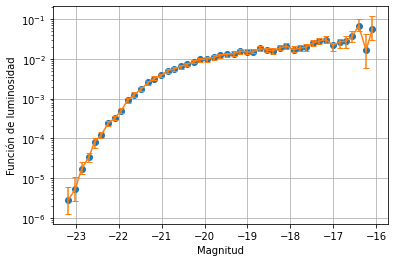

In [3]:
plt.plot(df['MAG'], df['PHI'], 'o')
plt.xlabel('Magnitud')
plt.ylabel('Función de luminosidad')
plt.yscale('log')
#plt.plot(df['MAG'], df['error_inf'], 'o') 
plt.errorbar(df['MAG'],df['PHI'], yerr  = [df['error_inf'],df['error_sup']], capsize = 3) #para agrear las barras de error
plt.grid()
plt.show()           

#### Problema 2.

Se desea ajustar el modelo m al conjunto de datos d, mediante un análisis Bayesiano. Para el caso de los datos del Problema 1, se utilizará como modelo la función de Schechter. 

Se comienza realizando la función 'model' con la fórmula de Schechter, reenombrando los parámetros de la forma $\phi_*$=fi0, $M_*$=M0 y $\alpha$=a. Para verificarlo se lo grafica con los parámetros encontrados por Blanton et al. 2001, junto con los datos. 

In [4]:
def modelo(M,fi0,M0,a):
    lista=[]
    for i in range(len(M)):
        y=0.4 * np.log(10) * fi0 * (10**(-0.4*(M[i]-M0)*(a+1))) * np.exp(-10**(-0.4*(M[i]-M0))) #schechter
        lista.append(y)
    return lista

In [5]:
cata= modelo(df['MAG'], 0.0146, -20.83, -1.2)
cata

[1.4040278080934103e-06,
 4.888456808494428e-06,
 1.3255000708875346e-05,
 3.569982600031592e-05,
 6.967299805184934e-05,
 0.00013780690394756172,
 0.0002582266496948288,
 0.0004301306220654319,
 0.0006764389119545665,
 0.0009936643939697763,
 0.0014122393739853332,
 0.001919135340755744,
 0.002592857057223568,
 0.003189038910070324,
 0.0039908871838231766,
 0.00479997137071492,
 0.00565503784709405,
 0.006479666024283157,
 0.0073544514003442574,
 0.008380951766040699,
 0.009244577325365285,
 0.010233693487576028,
 0.011156150872686786,
 0.012021795334300927,
 0.012935021330153488,
 0.013915118520262323,
 0.014727155986494525,
 0.015617251390706596,
 0.01640715656222816,
 0.017307607907181537,
 0.018166038940649686,
 0.018873273918623826,
 0.019747099394304714,
 0.020564783997564003,
 0.021440172736138918,
 0.022285313878193422,
 0.02301645230008652,
 0.02388645903920467,
 0.024677290456423893,
 0.025520129382601713,
 0.02642937923143356,
 0.027295885538427718,
 0.028141715287547373,
 

Ahora, lo que se hace es usar el linespace para que me haga puntos equispaciados para coordenadas en x e y, es decir, en magnitud y en phi. 

In [6]:
sx = np.linspace(-23.5, -16, 100) # los dos primeros valores son visuales del primer grafico
sy = modelo(sx, fi0=0.0146, M0=-20.83, a=-1.2) # uso los valores del paper de Blanton

Resta graficar.

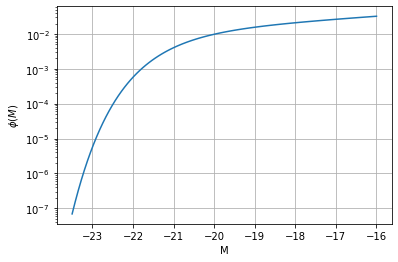

In [7]:
plt.plot(sx,sy,label='Modelo con los parámetros dados por Blanton')
plt.yscale('log')
plt.xlabel('M')
plt.ylabel('$\phi(M)$')
plt.grid()
plt.show()

Datos+Modelo

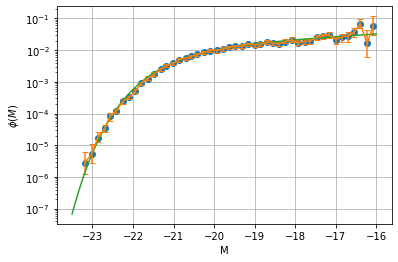

In [8]:
plt.plot(df['MAG'], df['PHI'], 'o')
plt.xlabel('Magnitud')
plt.ylabel('Función de luminosidad')
plt.yscale('log')
#plt.plot(df['MAG'], df['error_inf'], 'o') 
plt.errorbar(df['MAG'],df['PHI'], yerr  = [df['error_inf'],df['error_sup']], capsize = 3) #para agrear las barras de error
plt.plot(sx,sy,label='Modelo con los parámetros dados por Blanton')
plt.yscale('log')
plt.xlabel('M')
plt.ylabel('$\phi(M)$')
plt.grid()
plt.show()

Lo que se hace a continuación es ver de qué manera afecta cada parámetro al ajuste.

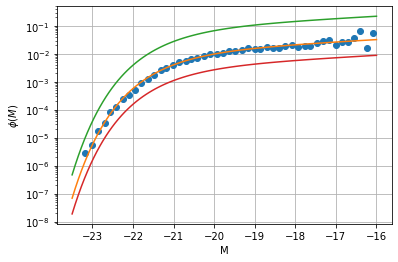

In [9]:
plt.plot(df['MAG'], df['PHI'], 'o')
plt.xlabel('Magnitud')
plt.ylabel('Función de luminosidad')
#plt.yscale('log')
sx = np.linspace(-23.5, -16, 100) # los dos primeros valores son visuales del primer grafico
sy = modelo(sx, fi0=0.0146, M0=-20.83, a=-1.2) # varío el primer parámetro
sy1 = modelo(sx, fi0=0.10, M0=-20.83, a=-1.2)
sy2 = modelo(sx, fi0=0.0040, M0=-20.83, a=-1.2)# uso los valores del paper de Blanton
plt.plot(sx,sy,label='Modelo con los parámetros dados por Blanton')
plt.plot(sx,sy1,label='Modelo con los parámetros dados por Blanton')
plt.plot(sx,sy2,label='Modelo con los parámetros dados por Blanton')
plt.yscale('log')
plt.xlabel('M')
plt.ylabel('$\phi(M)$')
plt.grid()
plt.show()
# si vario mas, tengo que encontrar que se me sube o baja el grafico, es como una especie de o.o

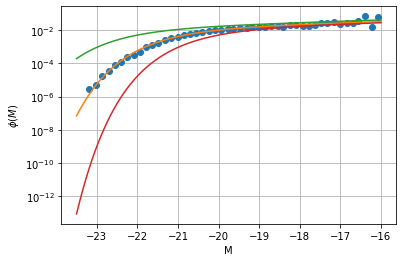

In [10]:
plt.plot(df['MAG'], df['PHI'], 'o')
plt.xlabel('Magnitud')
plt.ylabel('Función de luminosidad')
#plt.yscale('log')
sx = np.linspace(-23.5, -16, 100) # los dos primeros valores son visuales del primer grafico
sy = modelo(sx, fi0=0.0146, M0=-20.83, a=-1.2) # varío el segundo parámetro
sy1 = modelo(sx, fi0=0.0146, M0=-22, a=-1.2)
sy2 = modelo(sx, fi0=0.0146, M0=-20, a=-1.2)# uso los valores del paper de Blanton
plt.plot(sx,sy,label='Modelo con los parámetros dados por Blanton')
plt.plot(sx,sy1,label='Modelo con los parámetros dados por Blanton')
plt.plot(sx,sy2,label='Modelo con los parámetros dados por Blanton')
plt.yscale('log')
plt.xlabel('M')
plt.ylabel('$\phi(M)$')
plt.grid()
plt.show()
# aca voy a tener que variar un poco mas, tendria q ver que del lado izq se abren las ramas 

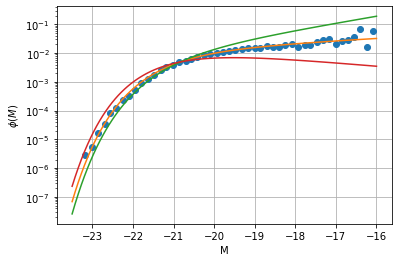

In [11]:
plt.plot(df['MAG'], df['PHI'], 'o')
plt.xlabel('Magnitud')
plt.ylabel('Función de luminosidad')
#plt.yscale('log')
sx = np.linspace(-23.5, -16, 100) # los dos primeros valores son visuales del primer grafico
sy = modelo(sx, fi0=0.0146, M0=-20.83, a=-1.2) # varío el tercer parámetro
sy1 = modelo(sx, fi0=0.0146, M0=-20.83, a=-1.6)
sy2 = modelo(sx, fi0=0.0146, M0=-20.83, a=-0.7)# uso los valores del paper de Blanton
plt.plot(sx,sy,label='Modelo con los parámetros dados por Blanton')
plt.plot(sx,sy1,label='Modelo con los parámetros dados por Blanton')
plt.plot(sx,sy2,label='Modelo con los parámetros dados por Blanton')
plt.yscale('log')
plt.xlabel('M')
plt.ylabel('$\phi(M)$')
plt.grid()
plt.show()

La siguiente pregunta que uno puede realizarse es: ¿ los parámetros presentados en el paper son realmente los mejores para ajustar los datos?. Para responder esta pregunta, lo que se hace a continuación es utilizar el likelihood, los prior y las funciones de probabilidad posterior para realizar las cadenas de Markov. De esta manera, se logra muestrear el espacio de parámetros y afirmar o no, si los parámetros del paper son realmente los mejores para el ajuste.  

Luego, el primer paso es definir a las funciones que se utilizarán. 

1) La función likelihood indica qué tan bien reproducen los datos a las predicciones del modelo. Se tiene que:

$$ p(d|\phi)= \prod_{i=1}^{N} p((M_i,\phi_i)|\phi_*, M_*, \alpha)  $$

Para calcular cada $ p((M_i,\phi_i)|\phi_*, M_*, \alpha) $ se asumen errores gaussianos. Este error se calcula para cada $ M_r  $ medido, evaluando la frecuencia $ \phi_i (=f)$ de los datos en una gaussiana centrada en el punto predicho por el modelo con parámetros fijos y sigma igual a la mitad del largo del ancho de las líneas de error. 

In [12]:
M=df['MAG']
f=df['PHI']

In [13]:
sigma= np.abs((df['error_sup'] - df['error_inf'])/2) # toma valor absoluto porque el sigma es el ancho de la gaussiana, no puede ser negativo el valor
sigma

0     8.300000e-07
1     1.430000e-06
2     2.340000e-06
3     2.500000e-07
4     3.100000e-07
5     1.460000e-06
6     2.885000e-06
7     2.500000e-06
8     1.276000e-05
9     2.132000e-05
10    3.225500e-05
11    2.836000e-05
12    5.890500e-05
13    6.810000e-05
14    1.670500e-05
15    1.166500e-04
16    5.226500e-05
17    6.173000e-05
18    6.975500e-05
19    3.596500e-05
20    9.950000e-06
21    3.563950e-04
22    8.210000e-05
23    2.833500e-04
24    2.129500e-04
25    3.399000e-04
26    3.582000e-04
27    3.712500e-04
28    5.926500e-04
29    1.054000e-04
30    1.271000e-04
31    1.635000e-05
32    4.744500e-04
33    6.857000e-04
34    5.129500e-04
35    1.905000e-05
36    5.132000e-04
37    4.353000e-04
38    4.780000e-04
39    7.104500e-04
40    1.064750e-03
41    1.420050e-03
42    1.448500e-04
43    1.338000e-03
44    6.152000e-03
45    7.833000e-03
46    1.600500e-02
dtype: float64

In [14]:
def likelihood(M,f,fi0,M0,a,sigma):
    f_modelo=modelo(M,fi0,M0,a) 
    c= 1/(np.sqrt(2*np.pi)*sigma)
    x= c*((f-f_modelo))**2/((np.sqrt(2)*sigma))**2
    likeli=-np.sum(x)/100000000 # aca multiplico todas las probabilidades
    return likeli

In [15]:
likelihood(df['MAG'],df['PHI'],0.0146,-20.83,-1.2,sigma) # Prueba con los valores del paper

-19.79369579221157

In [16]:
likelihood(M,f,0.03,-22,-1.9,sigma) # Prueba con otros valores

-1717536.660066997

Se debería ver que a medida que los parámetros utilizados se acercan más a los valores predichos por el modelo, el likelihood debe ir aumentando.

2. Para la probabilidad a priori de los parámetros se toma una distribución plana, asumiendo que no se conoce nada de los parámetros. Entonces, esta función devuelve un valor constante si se encuentra dentro de la región que se va a muestrear, mientras que es nula fuera de esa región. 

Para elegir los límites de los parámetros se prueban distintos valores y se los compara entre sí. Para ello se utiliza las pruebas realizadas anteriormente donde se concluyó que $ \phi_* $ desplaza el modelo hacia arriba o hacia abajo, $ M_* $ controla la subida de la función en el eje de las magnitudes y por último, $ \alpha $ influye en la pendiente de la parte lineal. 

Cabe remarcar que los parámetros no son independientes entre sí, por lo que para comprobar que los límites que se proponen son razonables y no quedan puntos medidos fuera de ellos, se consideran todos los modelos extremos dados por esos parámetros límites. 

In [17]:
def priors(fi0,M0,a,fi0lim, M0lim, alim):
    if (fi0lim[0]<=fi0) & (fi0<=fi0lim[1]) & (M0lim[0]<=M0) & (M0<=M0lim[1]) & (alim[0]<=a) & (a<=alim[1]):
        return 1
    else:
        return 0

In [18]:
fi0lim=[0.008,0.035]
M0lim=[-21.20,-20]
alim=[-1.66,-0.66]

In [19]:
priors(0.0146,-20.83,-1.2,fi0lim, M0lim, alim)

1

3. Para la función de probabilidad posterior se utiliza el Teorema de Bayes. Si se tiene un conjunto de datos $ d $ que se puede describir mediante un modelo $ m $ con parámetros $ \phi $, se quiere calcular el mejor modelo que puede dar lugar a esos datos, es decir, maximizar la probabilidad posterior de los parámetros dados los datos para un modelo,$p(\phi|d,m)$. Por el Teorema de Bayes, esta probabilidad se puede escribir como:

$$ p(\phi|d,m)= \frac{p(d|\phi,m)p(\phi|m)}{p(d|m)} $$

donde $ p(d|\phi,m) $ es el likelihood, $ p(\phi|m) $ es la función distribución de la probabilidad posterior y $ p(d|m) $ es la evidencia. 

Como en este caso el modelo $ m $ está fijo, se tiene que:

$$ p(\phi|d)= p(d|\phi)p(\phi)$$

Luego, con esto se puede definir la función posterior.

In [20]:
def posterior(M, f, fi0, M0, a, sigma,fi0lim, M0lim, alim):
    log_pos=likelihood(M,f,fi0,M0,a,sigma) + np.log(priors(fi0,M0,a,fi0lim,M0lim,alim))
    return(log_pos)

In [21]:
# Prueba con Blanton
posterior(M, f,0.0146,-20.83,-1.2,sigma,fi0lim, M0lim, alim)

-19.79369579221157

In [22]:
# Prueba con otros valores
posterior(M, f,2.9E-2,-20.83,-1.2, sigma,fi0lim, M0lim, alim)

-1007.6283158917498

/tmp/ipykernel_2928/4141239130.py:2: RuntimeWarning: divide by zero encountered in log
  log_pos=likelihood(M,f,fi0,M0,a,sigma) + np.log(priors(fi0,M0,a,fi0lim,M0lim,alim))


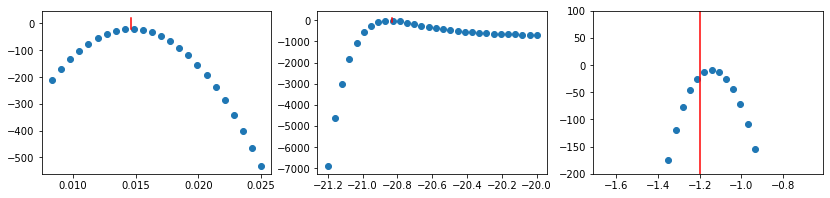

In [23]:
fi0c=np.linspace(0.004,0.025,30)
M0c=np.linspace(-21.20,-20,30)
a0=np.linspace(-1.66,-0.66,30)
a=[]
b=[]
c=[]
plt.figure(figsize = (14,3))
plt.subplot(1,3,1)
for i in range(30):
    a.append(posterior (M,f,fi0c[i],-20.83,-1.2,sigma,fi0lim,M0lim,alim))
plt.plot(fi0c,a,'o')
plt.plot([0.0146,0.0146], [-22,20],color="red")

plt.subplot(1,3,2)
for i in range(30):
    b.append(posterior (M,f,0.0146,M0c[i],-1.2,sigma,fi0lim,M0lim,alim))
plt.plot(M0c,b,'o')
plt.plot([-20.83,-20.83], [-100,100],color="red")

plt.subplot(1,3,3)
for i in range(30):
    c.append(posterior (M,f,0.0146,-20.83,a0[i],sigma,fi0lim,M0lim,alim))
plt.plot(a0,c,'o')
plt.plot([-1.2,-1.2], [-200,600],color="red")
plt.ylim(-200,100)

plt.show()

Se debería ver que para los valores de Blanton la probabilidad posterior es muy alta, y a medida que uno se aleja de estos valores la probablidad posterior disminuye. 

Luego, ya definidas las funciones de Likelihood, probabilidad posterior y prior, resta utilizarlas para generar el algoritmo de la cadena donde buscará un punto con alguna probabilidad inicial y luego de ello, saltará a algún valor cercano, evaluará el likelihood y lo compará con el anterior. Esta comparación arrojará un resultado mayor o menor a 0. Después, si el resultado es mayor a 0, se acepta el salto a ese punto. Pero, si el resultado es menor a 0, se le da la posibilidad de saltar o no, arrojando una especie de dado.  

El primer paso es definir a la función Metropolis, la cual dentro de sus variables, tendrá a los parámetros $\phi_*$, $M_*$, $\alpha$ del ajuste. Estos últimos son una especie de 'condiciones iniciales', por lo que el usuario debe ingrearlos a mano en primera instancia. Luego, para chequear si se encuentran o no en la región de muestreo, se realiza una condicional con la función priors antes definida. Ahora, ¿ a dónde van a parar estos parámetros? si se encuentran dentro de la región de muestreo, se guardan en una matriz de N filas y 3 columnas (una para cada parámetro), y sino, no se guardan. (primeros 6 renglones)

Luego, el siguiente paso es ir moviendosé en todas las filas de la matriz de parámetros e ir completandola. Para ello se crea un for, donde los i se van a mover de 0 a (N-1). Entonces, para el primer i se calcula su posterior, y se guarda en una lista vacía. Luego, se prosigue con el siguiente, (i+1). Ahora, la pregunta es ¿cómo se define el parámetro para (i+1)?  primero, se define en función del anterior, parametros[i][col], y luego, se le suma una cantidad random, que se mueva de -1 a 1, acotada por los fi0lim, M0lim, alim, antes determinados. (6-14)

El tercer paso es calcularle la prior a ese (i+1), que dará 0 o 1. 
· Si da 1, significa que el parámetro está dentro de la región de muestreo. Luego, se prosigue a calcular su posterior y guardar ese valor dentro de una variable y. Después, se restan la posterior del punto viejo con la posterior del punto nuevo, (x-y)=z. ¿ Esto para qué es? Como se está maximizando el likelihood, se quiere que a medida que se hagan saltos, el valor de la posterior aumente. Entonces, de esta resta salen dos opciones:
   1) Si z>=0, quiere decir que efectivamente, la posterior del nuevo punto es más alta que la posteriori del viejo punto. Entonces, se acepta y se salta al nuevo punto. 
   2) En el caso contrario, se redefine z como la exponencial de z, es decir, que los valores van desde 0 a 1, y se crea una random. Entonces, si los valores de esa random son más chicos que z, se acepta el punto y se salta. Pero, si el valor del random es más grande que z, no se acepta el punto para el nuevo salto y se sigue en el mismo punto viejo. 
· Si da 0, no se acepta el punto nuevo y se permanece en el viejo.

Y todo esto se repite (N-1) veces. (14-33)

In [24]:
def metrop(M,f,fi0,M0,a,N,fi0lim, M0lim, alim,sigma): 
    parametros= np.zeros((N,3)) # matriz
    if priors (fi0,M0,a,fi0lim, M0lim, alim) == 1: # condicional
        parametros[0][0], parametros[0][1], parametros[0][2] = fi0,M0,a
    else:
        return('Los parámetros elegidos están fuera de la región de muestreo') # renglón 6
    post=[]
    rlist=[]
    for i in range (N-1):
        x= posterior(M, f, parametros[i][0],parametros[i][1],parametros[i][2],sigma,fi0lim,M0lim,alim)
        post.append(x)
        parametros[i+1][0]= parametros[i][0] + ((np.random.rand()*2.0)-1.0)*((fi0lim[1]-fi0lim[0])/100)
        parametros[i+1][1]= parametros[i][1] + ((np.random.rand()*2.0)-1.0)*((M0lim[1]-M0lim[0])/100)
        parametros[i+1][2]= parametros[i][2] + ((np.random.rand()*2.0)-1.0)*((alim[1]-alim[0])/100) # renglón 14
        
        if priors (parametros[i+1][0], parametros[i+1][1], parametros[i+1][2], fi0lim, M0lim, alim) == 1:
            y= posterior(M, f, parametros[i+1][0],parametros[i+1][1],parametros[i+1][2],sigma,fi0lim,M0lim,alim)
            z= y-x
            rlist.append(z)
            if z>= 0:
                continue
            else:
                z=np.exp(z)
                random=np.random.random()
                if random<z:
                    continue
                else:
                    parametros[i+1][0]=parametros[i][0]
                    parametros[i+1][1]=parametros[i][1]
                    parametros[i+1][2]=parametros[i][2]
        else:
            parametros[i+1][0]=parametros[i][0]
            parametros[i+1][1]=parametros[i][1]
            parametros[i+1][2]=parametros[i][2]
            
    return (parametros,post,rlist)

In [25]:
#metrop(M,f,0.0146,-21,-1.4,25,fi0lim,M0lim,alim,sigma) # prueba 1 :)

Resta graficar varias cadenas en un mismo gráfico y ver su  comportamiento. Se harán dos tipos:
1) Se hará un gráfico Parámetro1 vs Parámetro2, con lo que debería verse que todas las cadenas arrancan en diferentes puntos, pues tienen condiciones iniciales diferentes, pero eventualmente deberían converger en una región en común. 
2) Se hará un gráfico con algún parámetro en el eje "y", y los saltos en el eje "x". Entonces, utilizando condiciones iniciales distribuidas homogéneamente, debería verse que luego de un tiempo todas las cadenas deberían converger en la misma región.

In [26]:
parametro= metrop(M,f,0.009,-21,-0.9,2000,fi0lim, M0lim, alim,sigma)[0] # esto devuelve una matriz Nx3
pos = metrop(M,f,0.009,-21,-0.9,2000,fi0lim, M0lim, alim,sigma)[1]

In [27]:
parametro[500:,0] # ejemplo

array([0.01704987, 0.01724328, 0.01747306, ..., 0.01552112, 0.01529161,
       0.01529161])

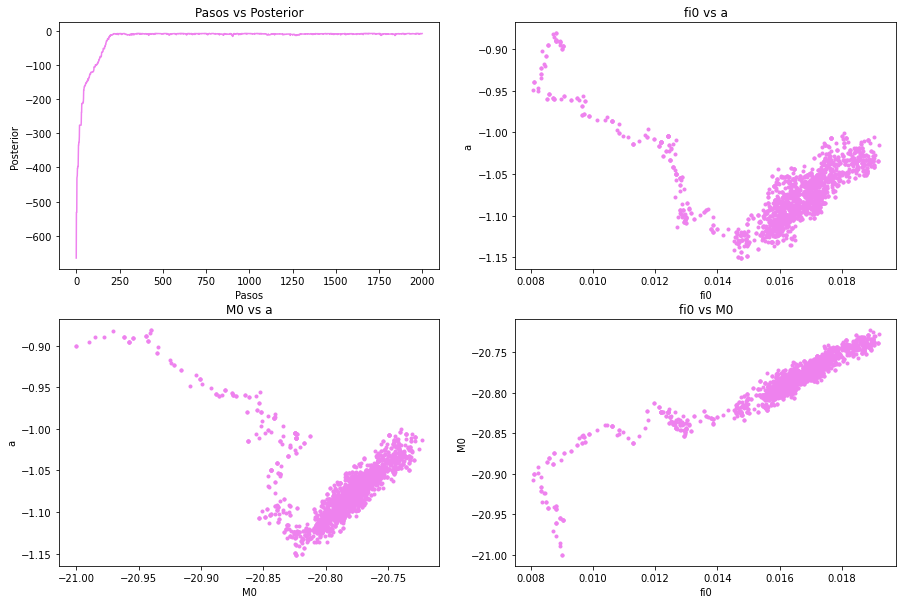

In [28]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.plot(pos,'-',ms=3, color='violet') # grafique los pasos
plt.title('Pasos vs Posterior')
plt.xlabel('Pasos')
plt.ylabel('Posterior')

plt.subplot(2,2,2)
plt.plot(parametro[:,0],parametro[:,2],'o',ms=3,color='violet')
plt.title('fi0 vs a')
plt.xlabel('fi0')
plt.ylabel('a')

plt.subplot(2,2,3)
plt.plot(parametro[:,1],parametro[:,2],'o',ms=3,color='violet')
plt.title('M0 vs a')
plt.xlabel('M0')
plt.ylabel('a')

plt.subplot(2,2,4)
plt.plot(parametro[:,0],parametro[:,1],'o',ms=3,color='violet')
plt.title('fi0 vs M0')
plt.xlabel('fi0')
plt.ylabel('M0')

plt.show()

Por último, sería útil determinar la media y desviación estandar de cada uno de los parámetros y ver si son indistinguibles o no a los parámetros presentados en el paper de Blanton. 

In [29]:
fi0prom= np.mean(parametro[500:,0])
fi0desv= np.std(parametro[500:,0]) # std es de desv. estándar

print(fi0prom,fi0desv)

In [30]:
M0prom= np.mean(parametro[500:,1])
M0desv= np.std(parametro[500:,1]) # std es de desv. estándar

print(M0prom,M0desv)

0.016934372992557088 0.0009351460926962281
-20.774413808976732 0.02074531921087599


In [31]:
aprom= np.mean(parametro[500:,2])
adesv= np.std(parametro[500:,2]) # std es de desv. estándar

print(aprom,adesv)

-1.0734802534108385 0.02938376315416764


#### Problema 3,4.

Lo que se realizará en este problema es el buen mezclado de varias cadenas. Para eso, se utilizan puntos iniciales bien distribuidos en el espacio de parámetros, generados aleatoriamente. 

fi0lim=[0.008,0.035]
M0lim=[-21.20,-20]
alim=[-1.66,-0.66]

In [32]:
genfi0= np.random.random()*0.021+0.004
genM0=np.random.random()*1.2-21.20
gena=np.random.random()*1-1.66

In [33]:
# Ahora le doy estos generadoras a la funcion metropolis para que arranque en puntos arbitrarios
#metrop(M,f,genfi0,genM0,gena,500,fi0lim, M0lim, alim,sigma)

Esto me genera solo 1 cadena con 500 pasos, con sus parametros aleatorios. Pero, seria util tener varias cadenas con todos sus parametros iniciales generados por generadores diferentes.

In [34]:
par=[]
pos=[]
for i in range (8):
    genfi0= np.random.random()*0.022+0.008
    genM0=np.random.random()*1.2-21.20
    gena=np.random.random()*1-1.66
    posterior1=metrop(M,f,genfi0,genM0,gena,2000,fi0lim, M0lim, alim,sigma)[1]
    parametros1=metrop(M,f,genfi0,genM0,gena,2000,fi0lim, M0lim, alim,sigma)[0]
    par.append(parametros1)
    pos.append(posterior1)
    

In [35]:
#par[i][:,0] # lo que se ve es que en la lista par, se guardaron 5 matrices, en las cuales en cada columna estan los 3 parametros.

In [36]:
pos[0][0] # primera lista del pos, y primer elemento (ejemplo)

-142.43962834073346

In [37]:
#d = [1,2,3,4,5] (ejemplo)
#plt.plot(d,'o')

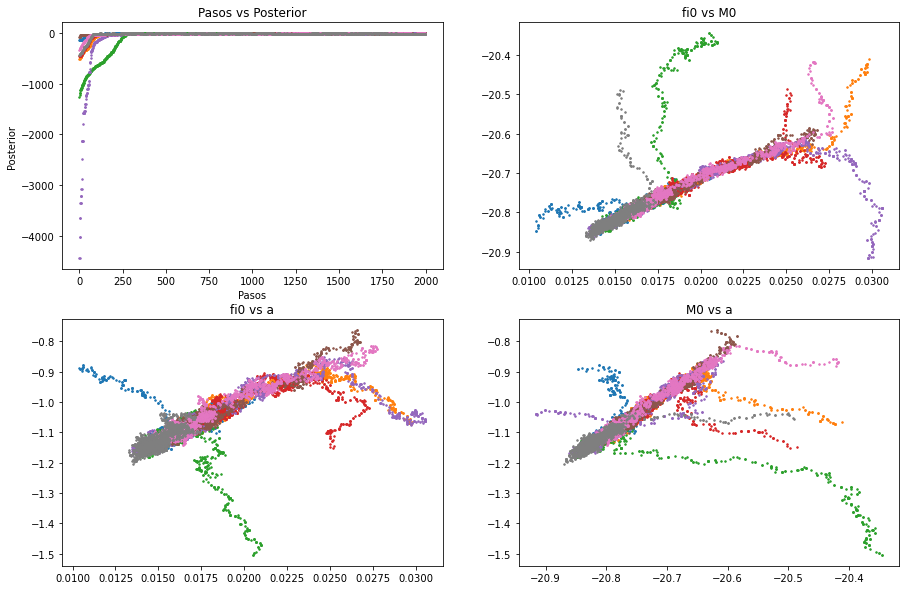

In [38]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
for i in range (8):
    plt.plot(pos[i],'.',ms=3) # grafique los pasos
plt.title('Pasos vs Posterior')
plt.xlabel('Pasos')
plt.ylabel('Posterior')

plt.subplot(2,2,2)
for i in range (8):
    plt.plot(par[i][:,0],par[i][:,1],'.',ms=3)
plt.title('fi0 vs M0')
    
plt.subplot(2,2,3)
for i in range (8):
    plt.plot(par[i][:,0],par[i][:,2],'.',ms=3)
plt.title('fi0 vs a')

plt.subplot(2,2,4)
for i in range (8):
    plt.plot(par[i][:,1],par[i][:,2],'.',ms=3)
plt.title('M0 vs a')


plt.show()

Van los malos mezclados. 

In [39]:
par2=[]
pos2=[]
for i in range (10):
    genfi0= np.random.random()*0.013+0.008
    genM0=np.random.random()*0.6-21.20
    gena=np.random.random()*0.5-1.66
    posterior1=metrop(M,f,genfi0,genM0,gena,1000,fi0lim, M0lim, alim,sigma)[1]
    parametros1=metrop(M,f,genfi0,genM0,gena,1000,fi0lim, M0lim, alim,sigma)[0]
    par2.append(parametros1)
    pos2.append(posterior1)
    

In [40]:
par2
#fi0lim=[0.008,0.035]
#M0lim=[-21.20,-20]
#alim=[-1.66,-0.66]

[array([[ 2.05385127e-02, -2.10056563e+01, -1.64994420e+00],
        [ 2.03340044e-02, -2.10132040e+01, -1.63994648e+00],
        [ 2.04815522e-02, -2.10019460e+01, -1.63583678e+00],
        ...,
        [ 1.63443008e-02, -2.07894029e+01, -1.10451544e+00],
        [ 1.62299131e-02, -2.07886981e+01, -1.09916664e+00],
        [ 1.62299131e-02, -2.07886981e+01, -1.09916664e+00]]),
 array([[ 1.43840937e-02, -2.11201312e+01, -1.19777464e+00],
        [ 1.43840937e-02, -2.11201312e+01, -1.19777464e+00],
        [ 1.42028431e-02, -2.11169649e+01, -1.20683819e+00],
        ...,
        [ 1.62550864e-02, -2.07800368e+01, -1.10154560e+00],
        [ 1.62550864e-02, -2.07800368e+01, -1.10154560e+00],
        [ 1.62550864e-02, -2.07800368e+01, -1.10154560e+00]]),
 array([[ 9.11698353e-03, -2.07718444e+01, -1.44976958e+00],
        [ 8.98552461e-03, -2.07803247e+01, -1.45487610e+00],
        [ 8.98552461e-03, -2.07803247e+01, -1.45487610e+00],
        ...,
        [ 1.29234245e-02, -2.08835711e+01,

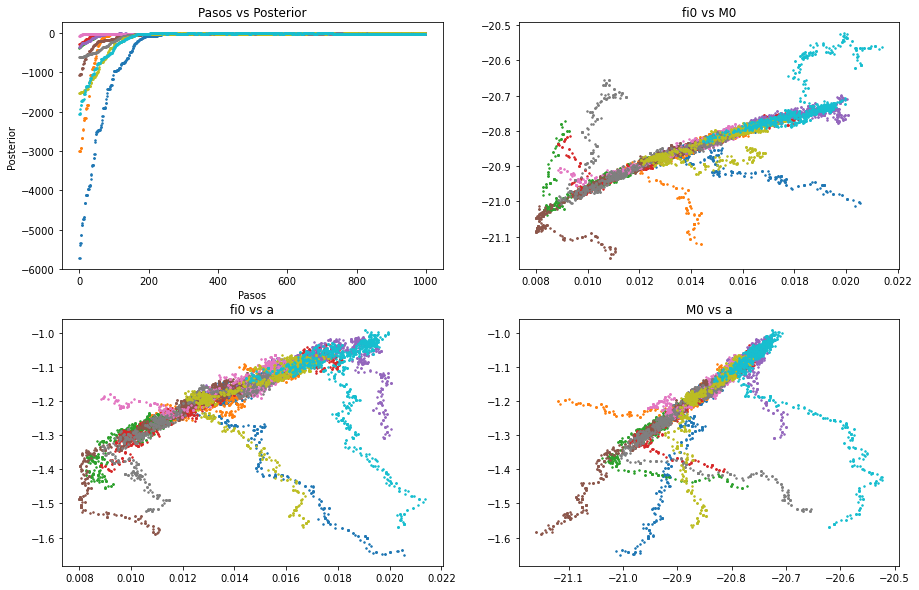

In [41]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
for i in range (10):
    plt.plot(pos2[i],'.',ms=3) # grafique los pasos
plt.title('Pasos vs Posterior')
plt.xlabel('Pasos')
plt.ylabel('Posterior')

plt.subplot(2,2,2)
for i in range (10):
    plt.plot(par2[i][:,0],par2[i][:,1],'.',ms=3)
plt.title('fi0 vs M0')
    
plt.subplot(2,2,3)
for i in range (10):
    plt.plot(par2[i][:,0],par2[i][:,2],'.',ms=3)
plt.title('fi0 vs a')

plt.subplot(2,2,4)
for i in range (10):
    plt.plot(par2[i][:,1],par2[i][:,2],'.',ms=3)
plt.title('M0 vs a')


plt.show()

Resta ver la comparación entre los buenos y malos mezclados. Para ello se verán gráficos parámetro vs pasos, en los cuales ser verán dos comportamientos: para el buen generador, se debe ver que las cadenas arrancan de puntos bien distribuidos en el espacio. Mientras que, en el mal generador se debería ver que las cadenas arrancan de puntos bastantes cercanos, es decir, no están bien distribuidos en el espacio. 

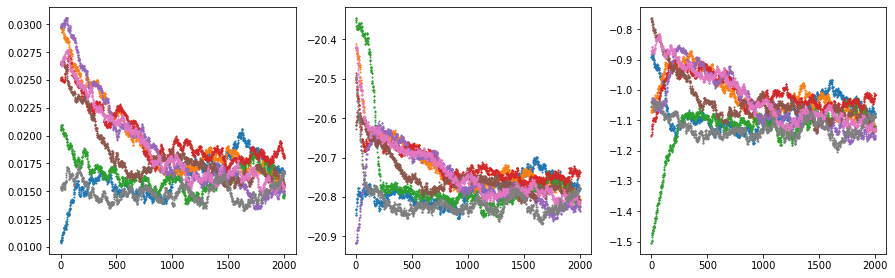

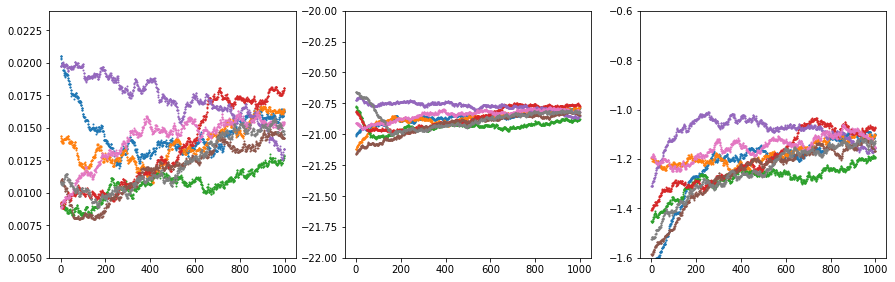

In [42]:
plt.figure(figsize = (15,10))
plt.subplot(2,3,1)
for i in range(8):
    plt.plot(par[i][:,0],'.', ms=2)
plt.subplot(2,3,2)
for i in range(8):
    plt.plot(par[i][:,1],'.', ms=2)
plt.subplot(2,3,3)    
for i in range(8):
    plt.plot(par[i][:,2],'.', ms=2)
    
plt.figure(figsize = (15,10))
plt.subplot(2,3,4)
for i in range(8):
    plt.plot(par2[i][:,0],'.', ms=2)
plt.ylim(0.005,0.024) # probar con los limites de los parametros 
plt.subplot(2,3,5)
for i in range(8):
    plt.plot(par2[i][:,1],'.', ms=2)
plt.ylim(-22,-20) 
plt.subplot(2,3,6)    
for i in range(8):
    plt.plot(par2[i][:,2],'.', ms=2)
plt.ylim(-1.6,-0.6)
plt.show()

#### Problema 5.

Obtengamos primero las componentes del gradiente en cada dirección, para ello se hace la derivada parcial del gradiente en cada una de las componentes (parámetros) y se divide por el modulo del cociente. 

In [119]:
def deriv1 (cata,f, fi0, M0, a, sigma): # derivada con respecto a fi0
    derivada1=[]
    #h=[]
    for i in range(len(f)):
        frida= -1/sigma[i]**2
        derivada1.append(frida*(f[i]-cata[i])*(cata[i]/fi0))
        #h.append(cata[i])
    s = np.sum(derivada1)
    return (s)
    

In [120]:
 deriv1 (cata, df['PHI'], 0.0146, -20.83 , -1.2, sigma) # valores de Balton

27304775.7239811

In [121]:
def deriv2 (cata,f,fi0,M0,a,sigma): # derivada con respecto a a
    derivada2=[]
    for i in range(len(f)):
        frida=-1/sigma[i]**2
        derivada2.append(frida*(f[i]-cata[i])*cata[i]*np.log(10)*(-0.4*(M[i]-M0)))
    s = np.sum(derivada2)
    return(s)


In [122]:
deriv2 (cata, df['PHI'], 0.0146, -20.83 , -1.2, sigma) # valores de Balton 

-1069341.3933516482

In [123]:
def deriv3 (cata,f, fi0, M0, a, sigma): # derivada con respecto a M0
    derivada3=[]
    for i in range(len(f)):
        frida= -1/sigma[i]**2
        g=-0.4*(M[i]-M0)
        derivada3.append(frida*(f[i]-cata[i])*cata[i]*np.log(10)*0.4*(a+1-10**g))
    s=np.sum(derivada3)
    return(s)


In [125]:
deriv3 (cata, df['PHI'], 0.0146, -20.83 , -1.2, sigma) # valores de Balton

-84658.96781018564

In [126]:
def modulo1(cata,f, fi0, M0, a, sigma):
    denominador=np.sqrt((deriv1 (cata,f, fi0, M0, a, sigma))**2 + (deriv2 (cata,f,fi0,M0,a,sigma)**2 + (deriv3 (cata,f, fi0, M0, a, sigma)**2)))
    modulo=deriv1 (cata,f, fi0, M0, a, sigma)/denominador
    return(modulo)

In [127]:
modulo1(cata,df['PHI'],0.0146, -20.83 , -1.2, sigma) # valores de Balton

0.9992292088034042

In [128]:
def modulo2(cata,f, fi0, M0, a, sigma):
    denominador=np.sqrt((deriv1 (cata,f, fi0, M0, a, sigma))**2 + (deriv2 (cata,f,fi0,M0,a,sigma)**2 + (deriv3 (cata,f, fi0, M0, a, sigma)**2)))
    modulo=deriv2 (cata,f, fi0, M0, a, sigma)/denominador
    return(modulo)

In [129]:
modulo2(cata,df['PHI'],0.0146, -20.83 , -1.2, sigma) # valores de Balton

-0.039132976781092746

In [130]:
def modulo3(cata,f, fi0, M0, a, sigma):
    denominador=np.sqrt((deriv1 (cata,f, fi0, M0, a, sigma))**2 + (deriv2 (cata,f,fi0,M0,a,sigma)**2 + (deriv3 (cata,f, fi0, M0, a, sigma)**2)))
    modulo=deriv3 (cata,f, fi0, M0, a, sigma)/denominador
    return(modulo)

In [131]:
modulo3(cata,df['PHI'],0.0146, -20.83 , -1.2, sigma) # valores de Balton

-0.0030981288503603463

Ahora resta definir el gradiente, cuyas componentes ya fueron calculadas.

In [132]:
def gradiente(cata,f, fi0, M0, a, sigma):
    grad= modulo1(cata,f,fi0,M0,a,sigma), modulo2(cata,f,fi0,M0,a,sigma), modulo3(cata,f,fi0,M0,a,sigma)
    return(grad)

Se evalúa el gradiente en los valores de Balton. 

In [133]:
gradiente(cata,f, 0.0146, -20.83, -1.2, sigma) # otros valores

(0.9992292088034042, -0.039132976781092746, -0.0030981288503603463)

Veamos los versores para distintos parámetros.

In [134]:
primeralista=[]
for i in range(50):
    fi0= np.linspace(0.008,0.035)
    M0= np.linspace(-21.20,-20)
    a=np.linspace(-1.66,-0.66)
    primeralista.append(gradiente(cata,f,fi0[i],M0[i],a[i],sigma))
primeralista

[(0.9996950530457936, -0.02417815306479702, -0.005021735769951856),
 (0.9996574122873735, -0.02564970178234309, -0.005210648461461491),
 (0.9996183545706666, -0.02709625309389443, -0.005379430611554611),
 (0.9995779983283225, -0.028517807135237244, -0.005528104027717535),
 (0.9995364588751667, -0.029914364822640097, -0.005656691307661796),
 (0.9994938484092847, -0.03128592780203627, -0.0057652158297432105),
 (0.9994502760138175, -0.03263249839940053, -0.005853701744797146),
 (0.9994058476594341, -0.03395407957232533, -0.005922173969400957),
 (0.9993606662074548, -0.03525067486280064, -0.005970658180574253),
 (0.9993148314135929, -0.03652228835120088, -0.005999180811927832),
 (0.9992684399322931, -0.037768924611481666, -0.0060077690512717495),
 (0.9992215853216352, -0.03899058866758872, -0.005996450839693076),
 (0.9991743580487825, -0.040187285951079954, -0.005965254872113873),
 (0.9991268454959493, -0.041359022259962124, -0.005914210599339757),
 (0.9990791319668667, -0.0425058037187426

Ahora al gradiente le voy a dar de comer tres valores iniciales que se encuentren dentro de los límites de los parámetros.

In [135]:
gradiente(cata,f, 0.020, -21, -1.2, sigma)

(0.9983832864216172, -0.05668788828388539, -0.004158932060596119)

In [136]:
N=1000
r1=np.zeros((N,3))
r1[0,0]=0.020
r1[0,1]=-21
r1[0,2]=-1.2
for i in range(1,N):
    frida2=gradiente(cata,f,r1[i-1,0],r1[i-1,1],r1[i-1,2],sigma)
    r1[i]=r1[i-1]+[0.000006,0.01,0.001]*np.array(frida2) # salto y transforma la tupla en arreglo

#r1[:,2] # aca lo que vemos es que los parametros se mueven al rededor de los valores de Balton, es decir, anda bien algoritmo

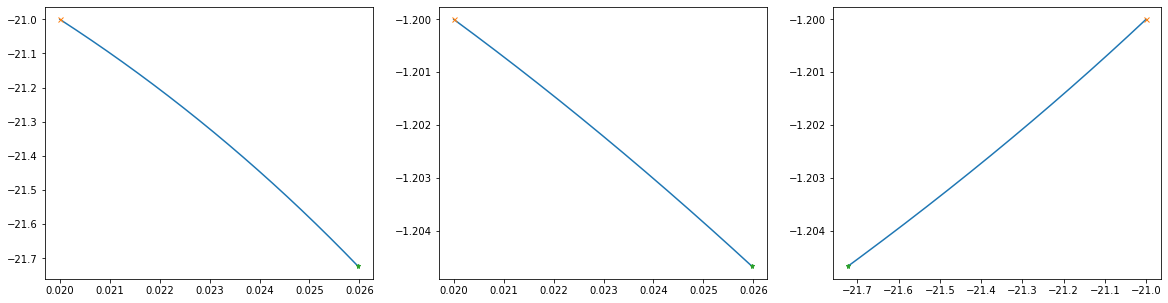

In [137]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(r1[:,0],r1[:,1], ms=5)
plt.plot(r1[0,0],r1[0,1], 'x', ms=5)
plt.plot(r1[-1,0],r1[-1,1], '*', ms=5)
plt.subplot(1,3,2)
plt.plot(r1[:,0],r1[:,2], ms=5)
plt.plot(r1[0,0],r1[0,2], 'x', ms=5)
plt.plot(r1[-1,0],r1[-1,2], '*', ms=5)
plt.subplot(1,3,3)
plt.plot(r1[:,1],r1[:,2], ms=5)
plt.plot(r1[0,1],r1[0,2], 'x', ms=5)
plt.plot(r1[-1,1],r1[-1,2], '*', ms=5)
plt.show()

Aca se ve hacia donde convergen.

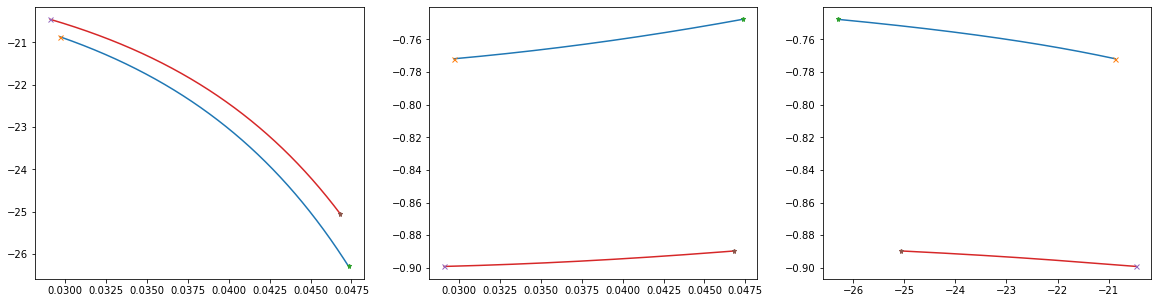

In [140]:
plt.figure(figsize=(20,5))
for j in range(2):
    genfi0= np.random.random()*0.022+0.008
    genM0=np.random.random()*1.2-21.20
    gena=np.random.random()*1-1.66
    N=3000
    r1=np.zeros((N,3))
    r1[0,0]=genfi0
    r1[0,1]=genM0
    r1[0,2]=gena
    for i in range(1,N):
        frida2=gradiente(cata,f,r1[i-1,0],r1[i-1,1],r1[i-1,2],sigma)
        r1[i]=r1[i-1]+[0.000006,0.01,0.001]*np.array(frida2)
       
    plt.subplot(1,3,1)
    plt.plot(r1[:,0],r1[:,1], ms=5)
    plt.plot(r1[0,0],r1[0,1], 'x', ms=5)
    plt.plot(r1[-1,0],r1[-1,1], '*', ms=5)
    plt.subplot(1,3,2)
    plt.plot(r1[:,0],r1[:,2], ms=5)
    plt.plot(r1[0,0],r1[0,2], 'x', ms=5)
    plt.plot(r1[-1,0],r1[-1,2], '*', ms=5)
    plt.subplot(1,3,3)
    plt.plot(r1[:,1],r1[:,2], ms=5)
    plt.plot(r1[0,1],r1[0,2], 'x', ms=5)
    plt.plot(r1[-1,1],r1[-1,2], '*', ms=5)
plt.show()